In [1]:
from nilearn import datasets, image
import nibabel as nib
import os
import os.path as op
import numpy as np
import scipy.io as sio
import scipy
import glob
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

# rest_dataset = datasets.fetch_development_fmri(n_subjects=5)
# test_filenames = rest_dataset.func

root = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D'
path = os.listdir(root)
func_filenames = []
for file in path:
    func_filenames.append(root + '\\' + file)

In [56]:
# mapas probabilísticos dos tecidos
tpm = nib.load(r'D:\ERICK\matlab\spm12\tpm\TPM.nii')
gm = tpm.slicer[:,:,:,0]
wm = tpm.slicer[:,:,:,1]
csf = tpm.slicer[:,:,:,2]
# view = plotting.view_img(gm, cmap='jet', cut_coords=(0, 0, 0), colorbar=True, title='GM')
# view.open_in_browser()

In [10]:
# runs_list = [1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [3]:
func_filenames

['C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_04_run_1_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_04_run_2_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_04_run_3_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_05_run_1_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_05_run_2_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_06_run_1_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_06_run_2_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\mestrado\\subjects\\task_volumes\\all_samples_full\\4D\\subject_06_run_3_full_4D.nii.gz',
 'C:\\Users\\erick\\Documents\\m

In [6]:
# # Transform 5D ants images to 4D 
# direc = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full'
# path = os.listdir(direc)
# filenames = []
# for file in path:
#     filenames.append(direc + '\\' + file)
    
# overwrite = False

# for file in filenames:
#     if op.isfile(file):
#         img = nib.load(file)
#         matrix = img.get_fdata().squeeze()
#         img = nib.Nifti1Image(matrix, img.affine, img.header)
#         basename = op.basename(file)
#         new_file = direc + '\\4D\\' + '{}_4D.nii.gz'.format(basename.split('.')[0])
#         print(new_file)
#         if not op.isfile(new_file) or overwrite:
#             nib.save(img, new_file)

In [51]:
# redimensionar máscaras dos tecidos
from scipy.ndimage import affine_transform

source_data =[gm, wm, csf]
target_data = components_img.slicer[:,:,:,0]
resampled_data = {'GM':[], 'WM':[], 'CSF':[]}

for i, tissue in enumerate(source_data):
    # Calcula o fator de reamostragem
    source_affine = tissue.affine
    target_affine = components_img.affine
    resample_factor = np.linalg.inv(source_affine).dot(target_affine)
    
    label = list(resampled_data.keys())[i]

    # Reamostrar a imagem fonte para a resolução da imagem alvo
    resampled_data[label] = affine_transform(
        tissue.get_fdata(),
        resample_factor,
        offset=resample_factor,
        output_shape=target_data.shape,
        order=2  # Interpolação cúbica
    )
    
    resampled_data[label] = [0 if value < 0.1 else value for value in resampled_data[label].flatten()]
    resampled_data[label] = np.array(resampled_data[label]).reshape(target_data.shape)

#     # Cria uma nova imagem NIfTI com os dados reamostrados e a affine da imagem alvo
#     resampled_img = nib.Nifti1Image(resampled_data[label], target_affine)

#     view = plotting.view_img(resampled_img, cmap='jet', cut_coords=(0, 0, 0), colorbar=True, title=label)
#     view.open_in_browser()

In [150]:
from nilearn.image import resample_to_img

datadir = 'D:\\ERICK\\MD\\'
load_file = op.join(datadir, 'master_dataset.csv')
data = pd.read_csv(load_file)
excluded = [41, 45]
for subj in excluded:
    data = data[data['rawSubjID']!=subj]
    
img_shape = [79, 95, 68]
target_data = components_img.slicer[:,:,:,0]
affine = [
    [-0.00561697462255816, -0.00503117083657452, -0.505330753006371, 96.6353828446782],
    [-0.465261057386564, 0.137487742394209, 0.00842419016249650, 103.345009310280],
    [0.111802800747851, 0.538962245266365, -0.0147670086051289, -60.8853152933907],
    [0, 0, 0, 1]
]


datadir = r'C:\Users\erick\Documents\mestrado'
for i, subj in enumerate(data['rawSubjID'].unique()):
    print(f'RawSubj {subj}, subj {i+1}')
    if subj < 10:
        subj_dir = glob.glob(op.join(datadir, 'subjects', f'0{subj}_CISC*'))
    else:
        subj_dir = glob.glob(op.join(datadir, 'subjects', '{}_CISC*'.format(subj)))
        
    wm_mask_file = glob.glob(op.join(subj_dir[0], 'MPRAGE_0005', 'MPRAGE_0005', 'c2s*'))[0]
    gm_mask_file = glob.glob(op.join(subj_dir[0], 'MPRAGE_0005', 'MPRAGE_0005', 'c1s*'))[0]
    
    # Carregar máscaras
    wm_mask = nib.load(wm_mask_file)
#     wm_mask = zoom(wm_mask, img_shape / np.array(wm_mask.shape), order=1)
    gm_mask = nib.load(gm_mask_file)
#     gm_mask = zoom(gm_mask, img_shape / np.array(gm_mask.shape), order=1)

#     gm_mask_mni = resample_to_img(gm_mask, target_data, interpolation='nearest')
    gm_mask_mni = image.resample_img(gm_mask, target_affine=affine, interpolation='nearest')
    
    oi

RawSubj 4, subj 1


NameError: name 'oi' is not defined

In [151]:
affine = components_img.affine
mask_img = nib.Nifti1Image(resampled_data, affine=affine)
view = plotting.view_img(gm_mask_mni, cmap='jet', cut_coords=(0, 0, 0), colorbar=True, title=label)
view.open_in_browser()

C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [142]:
resampled_data

array([[[-3.56315159e-50,  1.63475199e-48,  2.93736810e-47, ...,
         -7.65018457e-64, -2.79162419e-64, -1.14670834e-65],
        [-4.05480488e-48, -7.34494007e-47, -7.55365975e-46, ...,
          1.11490192e-62,  1.43332095e-63, -1.37659829e-65],
        [-3.52940567e-46, -5.68054353e-45, -4.97429330e-44, ...,
          3.50787910e-62, -2.60746302e-62, -3.73750544e-63],
        ...,
        [ 2.05232177e-54,  1.65603836e-53, -2.32477594e-52, ...,
          8.62696550e-60,  7.09684824e-61,  1.72595275e-62],
        [ 3.00750911e-55,  2.32141992e-54, -4.33738780e-53, ...,
          8.12207847e-61,  6.62136694e-62,  1.59299749e-63],
        [ 2.26084236e-56,  1.61941824e-55, -3.92746774e-54, ...,
          3.45178460e-62,  2.77642051e-63,  4.83334549e-65]],

       [[-2.77730843e-49,  1.93010250e-47,  3.80146782e-46, ...,
          5.17595205e-63, -2.26807835e-63, -1.14602689e-64],
        [-6.52008244e-47, -1.46081281e-45, -1.68467758e-44, ...,
         -1.90701446e-62,  2.09387388e

In [151]:
# Carrega o template MNI152
mni152_template = datasets.load_mni152_template()

arquivo_nii = r'C:\Users\erick\Documents\mestrado\subjects\04_CISC_13392\fMRI_block_1_0010\w_ufCISC13392-150417-00005-00005-1.nii'
template = nib.load(arquivo_nii)
affine = template.affine
rMNI = nib.Nifti1Image(mni152_template, affine)
rComps = nib.Nifti1Image(components_img, affine)

# Redimensiona o template para as dimensões desejadas
rMNI = image.resample_img(mni152_template, target_affine=affine, target_shape=(79, 95, 68))

# DICTIONARY LEARNING

C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


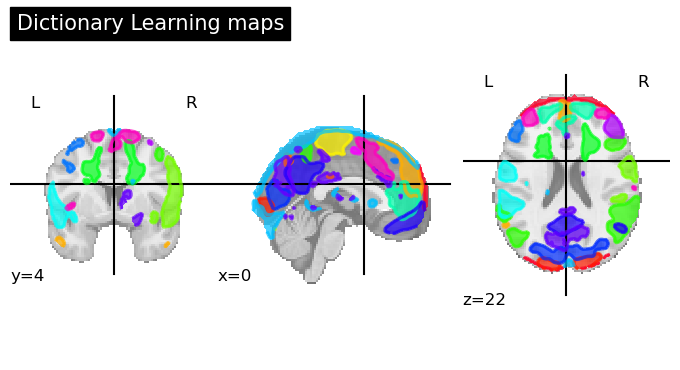

In [4]:
# DICTIONARY LEARNING
from nilearn.decomposition import DictLearning
from nilearn import plotting

# Initialize DictLearning object
dict_learn = DictLearning(
    n_components=20,
    n_epochs=10,
    smoothing_fwhm=None,
    memory="nilearn_cache",
    memory_level=2,
    random_state=0,
    standardize="zscore_sample",
#     target_affine=affine,
#     target_shape=(197, 233, 189), # images shape: (79, 95, 68)
#     mask_strategy="whole-brain-template",
)
# Fit to the data
dict_learn.fit(func_filenames)

# Resting state networks/maps in attribute `components_img_`
components_img = dict_learn.components_img_

plotting.plot_prob_atlas(
    components_img,
#     bg_img=rMNI,
    view_type="filled_contours",
    title="Dictionary Learning maps",
)

In [239]:
# # Show specifc components
# from nilearn import image

# comp = 1

# img = image.index_img(components_img, comp)
# coords = plotting.find_xyz_cut_coords(img)
# display = plotting.plot_stat_map(
#     img,
#     cut_coords=coords,
#     colorbar=False,
#     title=f"Showing component {comp + 1}",
# )

In [5]:
# # components_mask = dict_learn.components_
# components_mask = components_mask.reshape(len(components_mask), 79, 95, 68)

In [283]:
# redimensionar máscaras dos tecidos
from scipy.ndimage import affine_transform

source_data =[gm, wm, csf]
target_data = components_img.slicer[:,:,:,0]
resampled_data = {'GM':[], 'WM':[], 'CSF':[]}

for i, tissue in enumerate(source_data):
    # Calcula o fator de reamostragem
    source_affine = tissue.affine
    target_affine = components_img.affine
    resample_factor = np.linalg.inv(source_affine).dot(target_affine)

    # Reamostrar a imagem fonte para a resolução da imagem alvo
    resampled_data[i] = affine_transform(
        tissue.get_fdata(),
        resample_factor[:3, :3],
        offset=resample_factor[:3, 3],
        output_shape=target_data.shape,
        order=3  # Interpolação cúbica
    )

#     # Cria uma nova imagem NIfTI com os dados reamostrados e a affine da imagem alvo
#     resampled_img = nib.Nifti1Image(resampled_data, target_affine)

# view = plotting.view_img(resampled_img, cmap='jet', cut_coords=(0, 0, 0), colorbar=True, title='GM')
# view.open_in_browser()

In [358]:
corr_list = {'GM':[], 'WM':[], 'CSF':[]}
for t, tissue in enumerate(corr_list):
    print(tissue)
    for i in range(components_img.shape[3]):
        comp = components_img.get_fdata()[:,:,:,i]
        rho, p = scipy.stats.pearsonr(comp.flatten(), resampled_data[t].flatten())
        corr_list[tissue].append([i+1, rho**2, p])

GM
WM
CSF


In [306]:
corr_list['CSF'][0][1]

0.00029148763329664895

In [599]:
# exclude components with high corr with CSF and WM and low corr with GM
comps_img = components_img.get_fdata()
volumes_to_keep = []
for comp in range(0, 20):
    if corr_list['CSF'][comp][1] >= 0.025:
        print(f'Component {comp} is probably associated with csf')
        continue
    elif corr_list['WM'][comp][1] >= 0.025:
        print(f'Component {comp} is probably associated with wm')
        continue
    elif corr_list['GM'][comp][1] >= 0.025:
        volumes_to_keep.append(comp)

print(f'Only {len(volumes_to_keep)} components were kept')
gm_comps = np.squeeze(comps_img[:,:,:,[volumes_to_keep]])

outDir = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_maps\all_components.nii'
kept_comps = nib.Nifti1Image(gm_comps, components_img.affine, components_img.header)
nib.save(kept_comps, outDir)

Component 0 is probably associated with csf
Component 3 is probably associated with csf
Component 4 is probably associated with csf
Component 6 is probably associated with wm
Component 8 is probably associated with wm
Component 10 is probably associated with wm
Component 11 is probably associated with wm
Component 12 is probably associated with csf
Component 13 is probably associated with csf
Component 16 is probably associated with csf
Component 17 is probably associated with csf
Component 18 is probably associated with csf
Component 19 is probably associated with csf
Only 5 components were kept


In [598]:
kept_comps.shape

(79, 95, 68, 5)

In [317]:
# save each component
for i in range(kept_comps.shape[3]):
    img = kept_comps.slicer[:,:,:,i]
    outDir = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_maps\component_{}.nii'.format(i+1)
    nib.save(img, outDir)

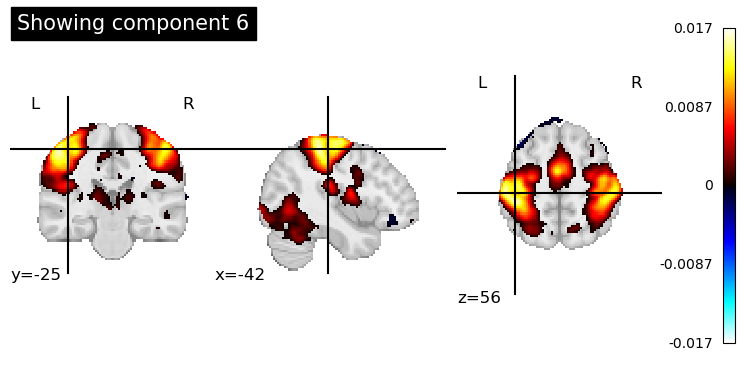

In [35]:
# Show specifc components
from nilearn import image

label = 6
comp = label - 1 

kept_comps = components_img

img = image.index_img(kept_comps, comp)
coords = plotting.find_xyz_cut_coords(img)
display = plotting.plot_stat_map(
    img,
    cut_coords=coords,
    colorbar=True,
    title=f"Showing component {label}",
)

In [5]:
# # Obter os coeficientes temporais
temporal_components_all = dict_learn.transform(func_filenames)
# temporal_components = [session[:, volumes_to_keep] for session in temporal_components]

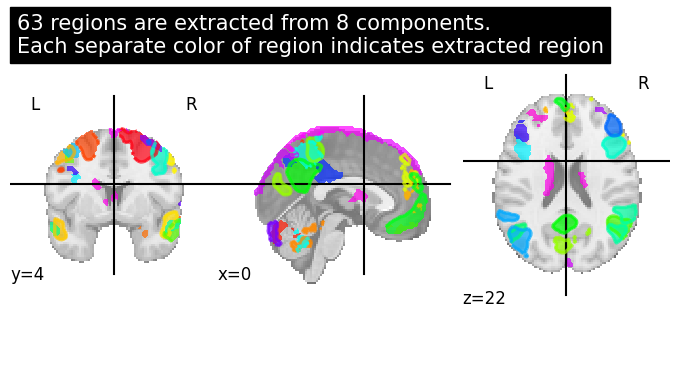

In [355]:
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(
    kept_comps,
    threshold=0.5,
    thresholding_strategy="ratio_n_voxels",
    extractor="local_regions",
    standardize=False,
#     standardize_confounds="zscore_sample",
    min_region_size=1350,
)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = (
    "%d regions are extracted from %d components."
    "\nEach separate color of region indicates extracted region"
    % (n_regions_extracted, kept_comps.shape[3])
)
plotting.plot_prob_atlas(
    regions_extracted_img, view_type="filled_contours", title=title
)

In [248]:
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)

direc = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples\4D'
path = os.listdir(direc)
filenames = []
for file in path:
    filenames.append(direc + '\\' + file)

root = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts'
overwrite = True
for file in filenames:
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(file)
    # Saving time-series
    basename = os.path.basename(file)
    basename = os.path.splitext(basename)[0]
    basename = os.path.splitext(basename)[0]
    outFile =  root + '\\' + basename + '.mat'
    print(outFile)
    data = {'avg_data':timeseries_each_subject}
    if not op.isfile(outFile) or overwrite:
        sio.savemat(outFile, data)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np

mean_correlations = np.mean(correlations, axis=0).reshape(
    n_regions_extracted, n_regions_extracted
)

C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_04_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_04_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_04_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_05_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_05_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_06_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_06_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_06_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_07_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_07_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_07_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volume

C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_39_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_39_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_40_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_40_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_40_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_42_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_42_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_42_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_43_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_43_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_ts\subject_43_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volume

In [250]:
# title = f"Correlation between {int(n_regions_extracted)} regions"

# # First plot the matrix
# display = plotting.plot_matrix(
#     mean_correlations, vmax=1, vmin=-1, colorbar=True, title=title
# )

# # Then find the center of the regions and plot a connectome
# regions_img = regions_extracted_img
# coords_connectome = plotting.find_probabilistic_atlas_cut_coords(regions_img)

# plotting.plot_connectome(
#     mean_correlations, coords_connectome, edge_threshold=0.65, title=title
# )

In [31]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

datadir = 'D:\\ERICK\\MD\\'
load_file = op.join(datadir, 'master_dataset.csv')
data = pd.read_csv(load_file)
excluded = [41, 45]
for subj in excluded:
    data = data[data['rawSubjID']!=subj]
# remove incomplete session of subj 10
data = data[~((data['rawSubjID']==10) & (data['run']==1))]
# runs_list = data.groupby('subj')['run'].unique().tolist()
    
#consider all data
comps_img = components_img.get_fdata()
kept_comps = comps_img
temporal_components = temporal_components_all

volumes_per_session = []
for tcomp in temporal_components:
    volumes_per_session.append(tcomp.shape[0])
    
r2_scores = {}
for comp in range(kept_comps.shape[3]):
    r2_list = []
    j = 0
    for i, subj in enumerate(data['rawSubjID'].unique()):
        print(f'RawSubj {subj}, subj {i+1}')
#         sub = data.loc[data['subj']==subj, 'rawSubjID'].unique()
        t_corr = np.array(pd.read_csv(f'D:/ERICK/MD/extracted_voxels/{subj}/time_corr.csv', header=None))
        run = runs_list[i]
        r = int(run)-1
        subset = data[(data['rawSubjID']==subj) & (data['run']==run)]
        onsets = subset['movieStartSecs'] - t_corr[r, :]*0.8
        duration = subset['veridicalDuration']
        bias = subset['humanBias']
        events = {'onset':onsets, 'duration':duration}
        events = pd.DataFrame(events)

        frame_times = np.arange(0, volumes_per_session[j]*0.8, 0.8)

        # Criar a matriz de desenho experimental
        design_matrix = make_first_level_design_matrix(
            frame_times, events, hrf_model='spm', drift_model=None, high_pass=None
        )

        model = LinearRegression().fit(design_matrix, temporal_components[j][:, comp])
        predictions = model.predict(design_matrix)
        r2 = r2_score(temporal_components[j][:, comp], predictions)
        r2_list.append(r2)
        r2_scores['component_{}'.format(comp+1)] = f'{np.mean(r2_list)} +/- {np.std(r2_list)}'
#         r2_scores['component_{}'.format(comp+1)] = r2_list

        j+=1

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

In [32]:
r2_scores

{'component_1': '0.30244539245097757 +/- 0.21341554200046756',
 'component_2': '0.022751820146786606 +/- 0.026748591264629657',
 'component_3': '0.06967540239068114 +/- 0.0885512407596746',
 'component_4': '0.0215264887635958 +/- 0.02650681629385257',
 'component_5': '0.017895952232929713 +/- 0.02495707128966529',
 'component_6': '0.2443307060036016 +/- 0.14376524518142367',
 'component_7': '0.008991675724134457 +/- 0.013267506181564801',
 'component_8': '0.06241319818179417 +/- 0.09847459168089362',
 'component_9': '0.04171907332771807 +/- 0.0769353462137669',
 'component_10': '0.0760077435503986 +/- 0.08103599187887418',
 'component_11': '0.034948011117861215 +/- 0.04326810077495436',
 'component_12': '0.10054160592241428 +/- 0.12731568084942416',
 'component_13': '0.11637793789124168 +/- 0.09851616515095397',
 'component_14': '0.01602489937353294 +/- 0.02371883536012279',
 'component_15': '0.032206016196772054 +/- 0.052383280869292344',
 'component_16': '0.047664096453154316 +/- 0.0

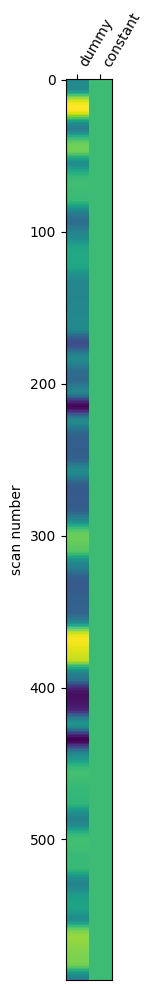

In [590]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)
plt.show()

# ICA


[MultiNiftiMasker.fit] Loading data from [C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_04_run_1_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_04_run_2_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_04_run_3_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_05_run_1_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_05_run_2_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_06_run_1_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_06_run_2_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\subject_06_run_3_full_4D.nii.gz,
 C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples_full\4D\su

[CanICA] Loading data
[Memory]2.2s, 0.0min    : Loading randomized_svd...
______________________________________randomized_svd cache loaded - 0.0s, 0.0min
[Memory]3.0s, 0.1min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]3.3s, 0.1min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.4s, 0.0min
[Memory]4.0s, 0.1min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.2s, 0.0min
[Memory]4.4s, 0.1min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.3s, 0.0min
[Memory]4.9s, 0.1min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.3s, 0.0min
[Memory]5.4s, 0.1min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]5.7s, 0.1min    : Loading fastica...
____________________________________________

C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\plotting\displays\_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\numpy\ma\core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


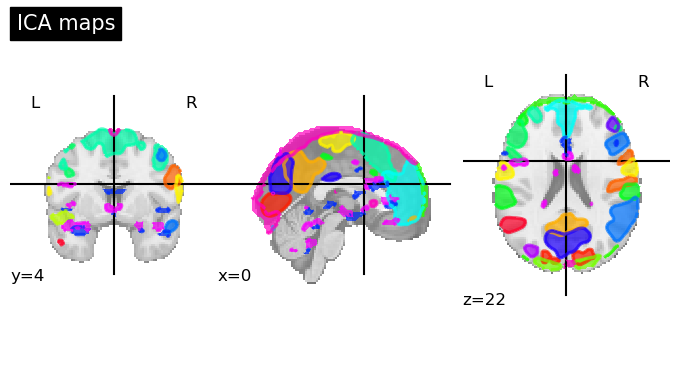

In [2]:
from nilearn.decomposition import CanICA
from nilearn import plotting

# ICA
canica = CanICA(
    n_components=20,
    smoothing_fwhm=None,
    memory="nilearn_cache",
    memory_level=2,
    verbose=5,
#     mask_strategy="whole-brain-template",
    random_state=0,
    standardize="zscore_sample",
    n_jobs=1,
)
canica.fit(func_filenames)

# Resting state networks/maps in attribute `components_img_`
components_img = canica.components_img_ 

plotting.plot_prob_atlas(
    components_img,
    view_type="filled_contours",
    title="ICA maps",
)

# Analysis

In [55]:
corr_list = {'GM':[], 'WM':[]}
for t, tissue in enumerate(corr_list):
    print(tissue)
    label = list(resampled_data.keys())[t]
    for i in range(components_img.shape[3]):
        comp = components_img.get_fdata()[:,:,:,i]
        rho, p = scipy.stats.pearsonr(comp.flatten(), resampled_data[label].flatten())
        corr_list[tissue].append([i+1, rho**2, p])

GM
WM
CSF


In [6]:
# exclude components with high corr with CSF and WM and low corr with GM
comps_img = components_img.get_fdata()
# comps_to_keep = []
# for comp in range(1, 21):
#     print('Running component:', comp)
# #     if corr_list['CSF'][comp-1][1] >= 0.025:
# #         print(f'Component {comp} is probably associated with csf')
# #         continue
#     elif corr_list['WM'][comp-1][1] >= 0.025:
#         print(f'Component {comp} is probably associated with wm')
#         continue
#     elif corr_list['GM'][comp-1][1] >= 0.025:
#         print(f'Component {comp} is probably associated with GM')
#         comps_to_keep.append(comp)

# print(f'Only {len(comps_to_keep)} components were kept')
# gm_comps = np.squeeze(comps_img[:,:,:,[comps_to_keep]])

# outDir = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\DL_maps\all_components.nii'
# kept_comps = nib.Nifti1Image(gm_comps, components_img.affine, components_img.header)
# nib.save(kept_comps, outDir)

In [65]:
# corr_list['GM']

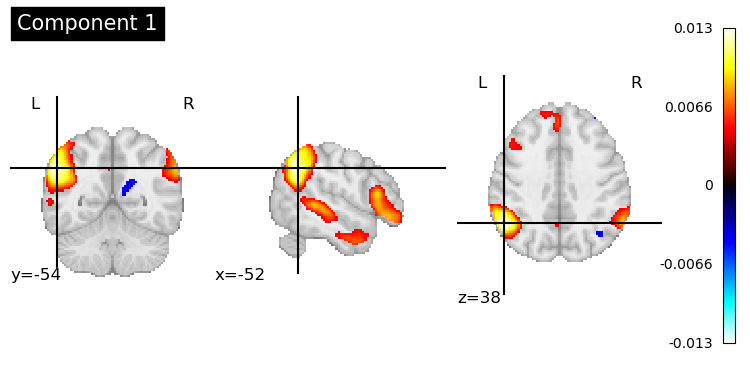

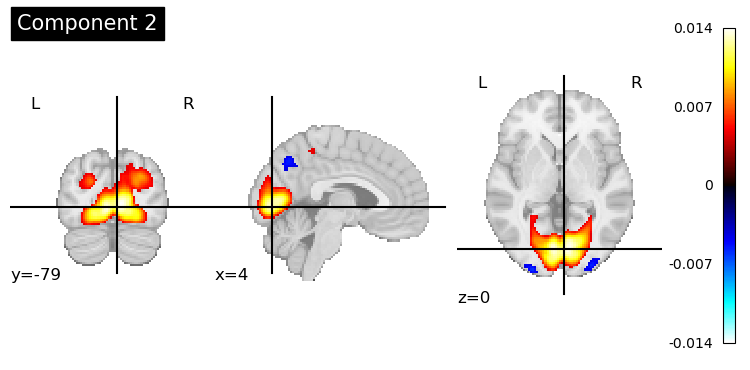

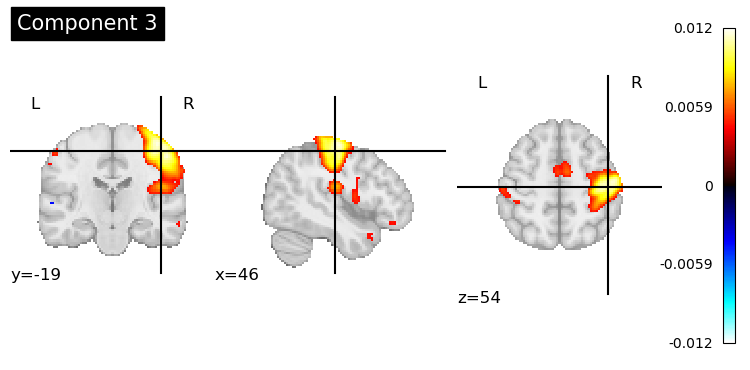

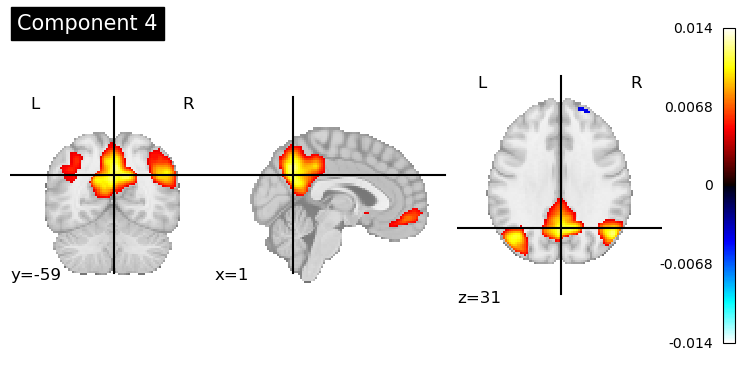

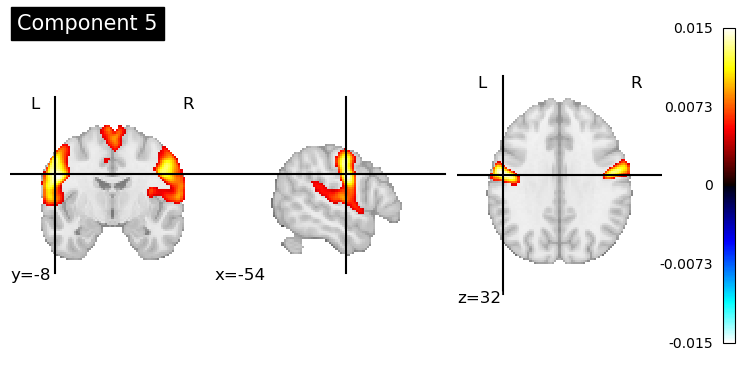

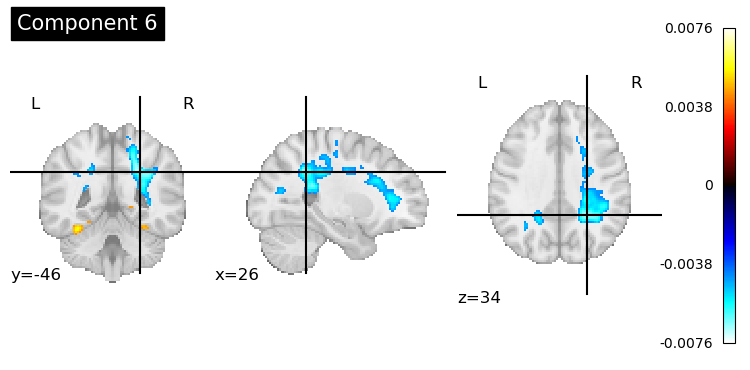

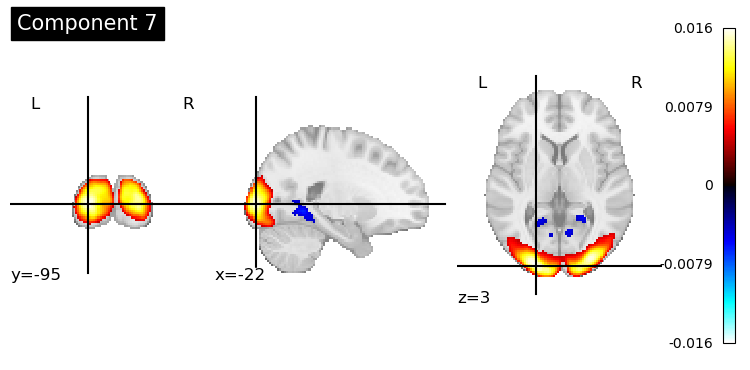

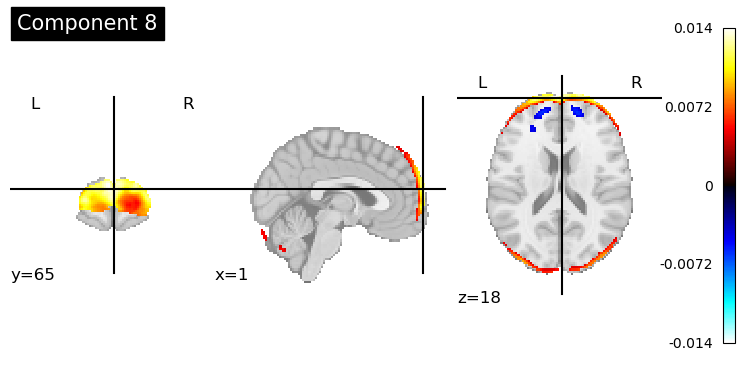

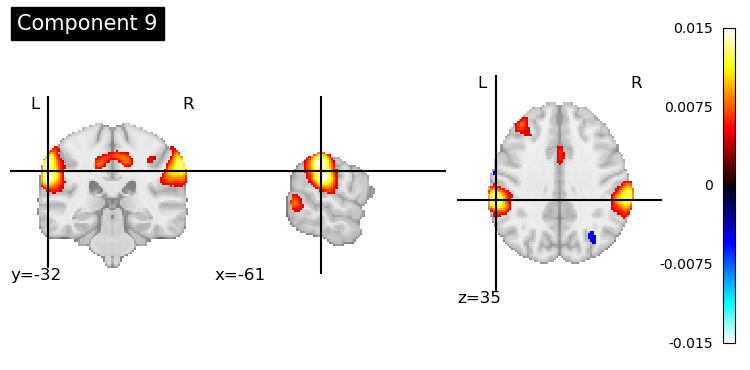

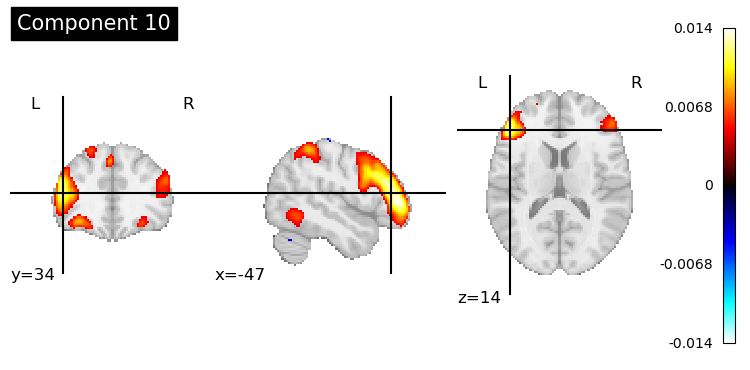

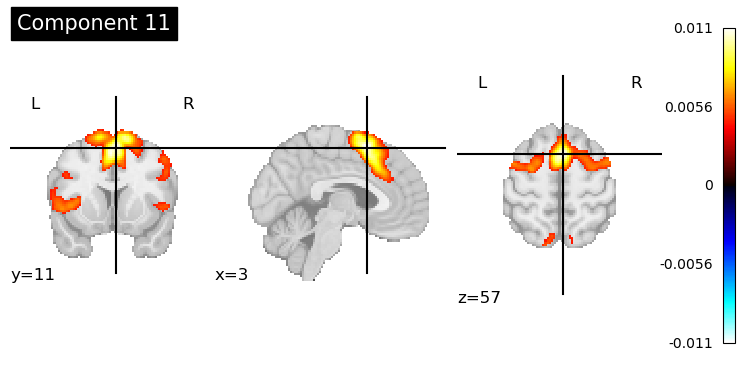

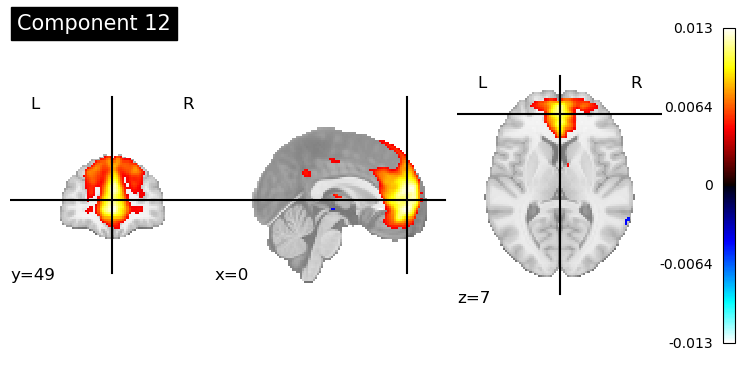

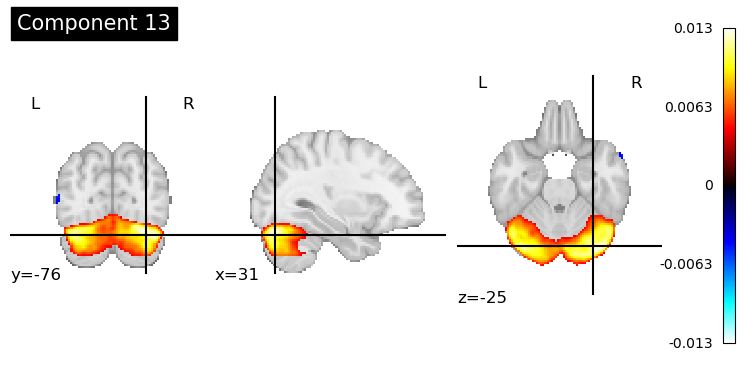

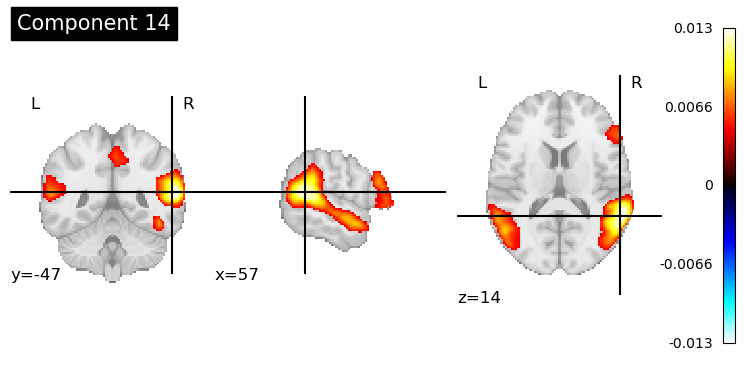

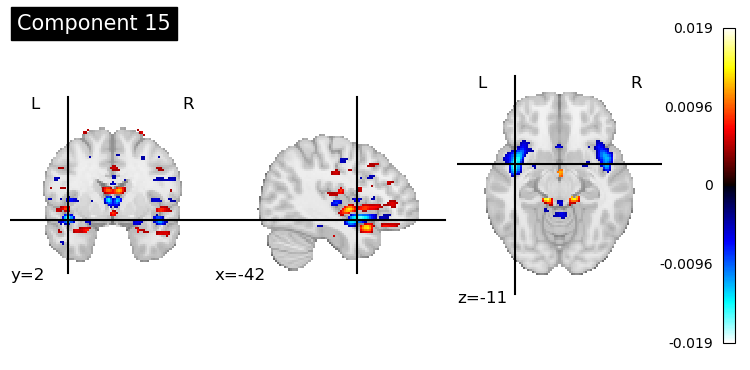

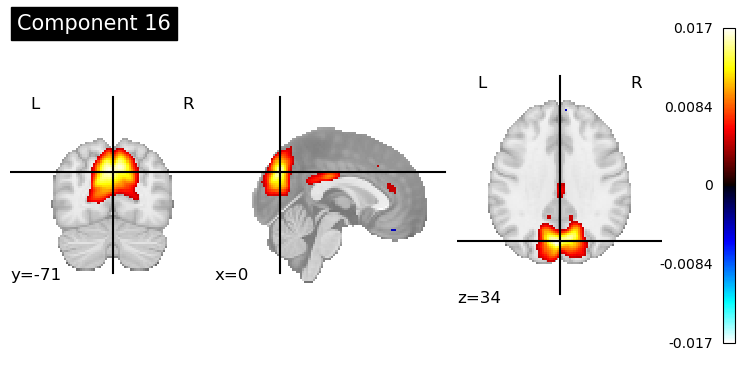

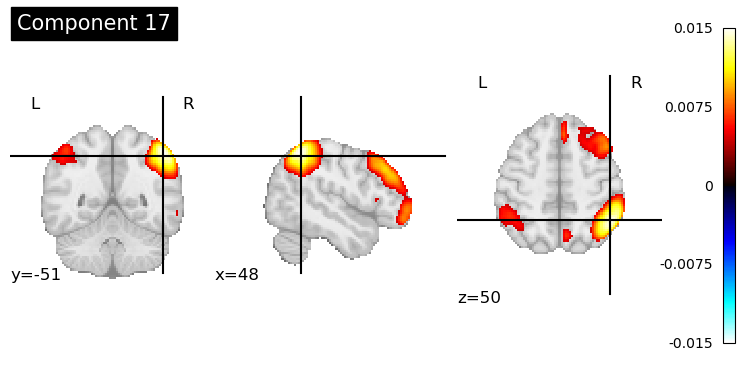

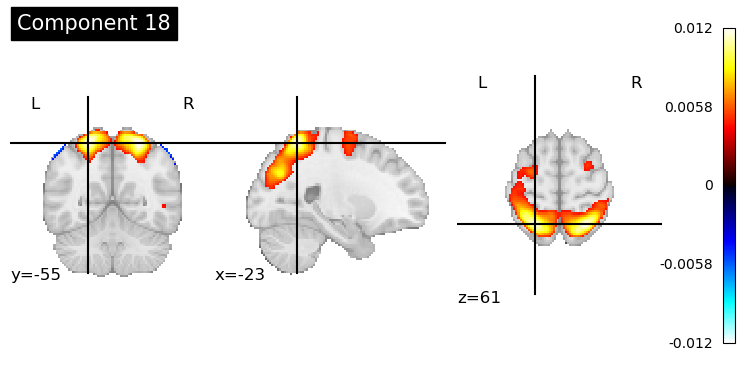

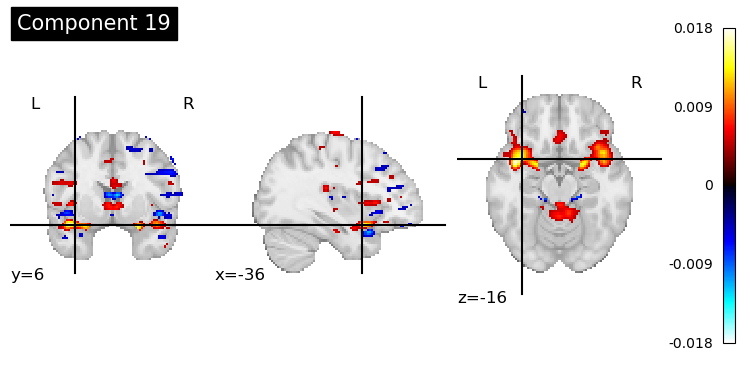

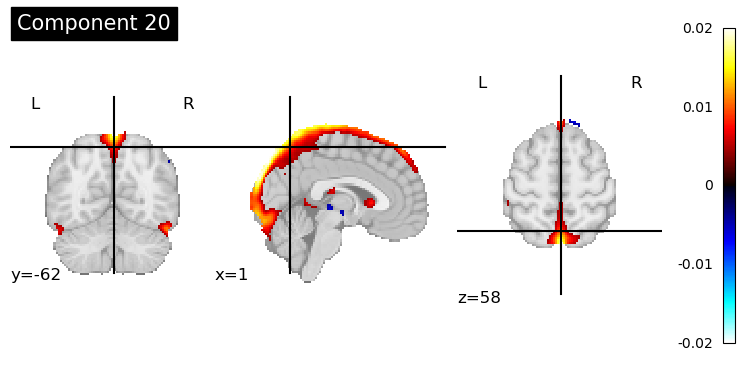

In [3]:
# Show specifc components
from nilearn import image

for label in range(1, 21):
    comp = label - 1 

    kept_comps = components_img

    img = image.index_img(kept_comps, comp)
    coords = plotting.find_xyz_cut_coords(img)
    display = plotting.plot_stat_map(
        img,
        cut_coords=coords,
        colorbar=True,
        title=f"Component {label}",
    )

In [7]:
# # Obter os coeficientes temporais
temporal_components_all = canica.transform(func_filenames)
# temporal_components = [session[:, comps_to_keep] for session in temporal_components]

In [92]:
temporal_components_all[0].shape

(668, 20)

In [84]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

datadir = 'D:\\ERICK\\MD\\'
load_file = op.join(datadir, 'master_dataset.csv')
data = pd.read_csv(load_file)
excluded = [41, 45]
for subj in excluded:
    data = data[data['rawSubjID']!=subj]
# remove incomplete session of subj 10
data = data[~((data['rawSubjID']==10) & (data['run']==1))]
runs_list = data.groupby('subj')['run'].unique().tolist()
    
#consider all data
kept_comps = comps_img
temporal_components = temporal_components_all

volumes_per_session = []
for tcomp in temporal_components:
    volumes_per_session.append(tcomp.shape[0])
    
r2_scores = {}
r2_scores_mean = {}
for comp in range(kept_comps.shape[3]):
    r2_list = []
    r2_mean = []
    j = 0 #indicates the run
    for i, subj in enumerate(data['rawSubjID'].unique()):
        print(f'RawSubj {subj}, subj {i+1}')
        r2_sub = []
#         sub = data.loc[data['subj']==subj, 'rawSubjID'].unique()
        t_corr = np.array(pd.read_csv(f'D:/ERICK/MD/extracted_voxels/{subj}/time_corr.csv', header=None))
        for r, run in enumerate(runs_list[i]):
            subset = data[(data['rawSubjID']==subj) & (data['run']==run)]
            onsets = subset['movieStartSecs'] - t_corr[r, :]*0.8
            duration = subset['veridicalDuration']
            bias = subset['humanBias']
            events = {'onset':onsets, 'duration':duration}
            events = pd.DataFrame(events)

            frame_times = np.arange(0, volumes_per_session[j]*0.8, 0.8)

            # Criar a matriz de desenho experimental
            design_matrix = make_first_level_design_matrix(
                frame_times, events, hrf_model='spm', drift_model=None)

            model = LinearRegression().fit(design_matrix, temporal_components[j][:, comp])
            predictions = model.predict(design_matrix)
            r2 = r2_score(temporal_components[j][:, comp], predictions)
            r2_list.append(r2)
            r2_sub.append(r2)

            j+=1
            
        r2_mean.append(np.mean(r2_sub))
        
#     r2_scores['component_{}'.format(comp+1)] = f'{np.mean(r2_list)} +/- {np.std(r2_list)}'
    r2_scores_mean['component_{}'.format(comp+1)] = f'{np.mean(r2_mean)} +/- {np.std(r2_mean)}'
    #         r2_scores['component_{}'.format(comp+1)] = r2_list
    r2_scores[comp+1] = r2_list
#     r2_scores_mean[comp+1] = r2_mean

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4
RawSubj 10, subj 5


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9
RawSubj 15, subj 10


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 7, subj 4
RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19
RawSubj 25, subj 20


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24
RawSubj 30, subj 25


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29
RawSubj 35, subj 30


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 43, subj 37
RawSubj 44, subj 38
RawSubj 4, subj 1
RawSubj 5, subj 2
RawSubj 6, subj 3
RawSubj 7, subj 4


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 10, subj 5
RawSubj 11, subj 6
RawSubj 12, subj 7
RawSubj 13, subj 8
RawSubj 14, subj 9


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 15, subj 10
RawSubj 16, subj 11
RawSubj 17, subj 12
RawSubj 18, subj 13
RawSubj 19, subj 14
RawSubj 20, subj 15
RawSubj 21, subj 16
RawSubj 22, subj 17
RawSubj 23, subj 18
RawSubj 24, subj 19


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 25, subj 20
RawSubj 26, subj 21
RawSubj 27, subj 22
RawSubj 28, subj 23
RawSubj 29, subj 24


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 30, subj 25
RawSubj 31, subj 26
RawSubj 32, subj 27
RawSubj 33, subj 28
RawSubj 34, subj 29


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

RawSubj 35, subj 30
RawSubj 36, subj 31
RawSubj 37, subj 32
RawSubj 38, subj 33
RawSubj 39, subj 34
RawSubj 40, subj 35
RawSubj 42, subj 36
RawSubj 43, subj 37
RawSubj 44, subj 38


C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\erickenv\Lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:128: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
C:\Users\erick\.conda\envs\eri

<BarContainer object of 38 artists>

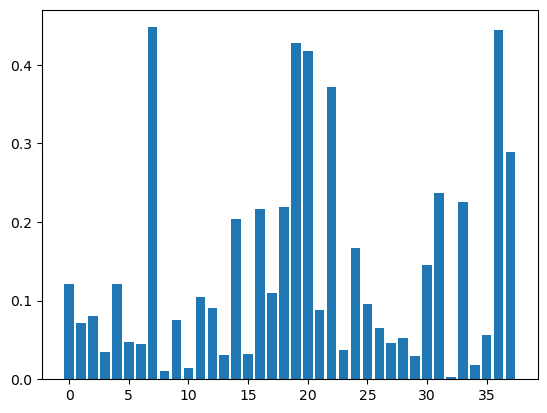

In [64]:
x = np.arange(38)
plt.bar(x, r2_scores_mean[7])

In [23]:
from scipy import stats

for comp in r2_scores:
    print('Component', comp)
#     print(r2_scores[comp])
    # Realizar o teste t de uma amostra
    t_statistic, p_value = stats.ttest_1samp(r2_scores[comp], popmean=0)

    # Exibir os resultados
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Interpretação do p-valor
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print("A média é significativamente diferente de zero.")
    else:
        print("Não há evidências suficientes para afirmar que a média é diferente de zero.")
    
    print('-------------------------')

Component 1
T-statistic: 8.929297721040326
P-value: 1.1755945348059437e-14
A média é significativamente diferente de zero.
-------------------------
Component 2
T-statistic: 18.31404874620123
P-value: 4.7631916294982515e-35
A média é significativamente diferente de zero.
-------------------------
Component 3
T-statistic: 13.271115582447132
P-value: 1.6787151090119608e-24
A média é significativamente diferente de zero.
-------------------------
Component 4
T-statistic: 8.807855218677403
P-value: 2.214447816031079e-14
A média é significativamente diferente de zero.
-------------------------
Component 5
T-statistic: 9.059435143052543
P-value: 5.956806062808532e-15
A média é significativamente diferente de zero.
-------------------------
Component 6
T-statistic: 11.942996951904755
P-value: 1.5858695193478703e-21
A média é significativamente diferente de zero.
-------------------------
Component 7
T-statistic: 9.32635088907072
P-value: 1.4721629386893176e-15
A média é significativamente dif

In [85]:
r2_scores_mean

{'component_1': '0.024959063154560753 +/- 0.02086725459293462',
 'component_2': '0.3167689874686129 +/- 0.1411217375438357',
 'component_3': '0.1552500316862019 +/- 0.08546732643944586',
 'component_4': '0.046065210271598836 +/- 0.04477681836160162',
 'component_5': '0.03578862628109897 +/- 0.026964384174282322',
 'component_6': '0.10522947612833451 +/- 0.06593223610899931',
 'component_7': '0.1393156351720319 +/- 0.1308030181390983',
 'component_8': '0.032800954917268636 +/- 0.03991048244253227',
 'component_9': '0.07431203313296081 +/- 0.04010678123574619',
 'component_10': '0.04642432501083956 +/- 0.04529446089878285',
 'component_11': '0.0955548187175317 +/- 0.05736484409255517',
 'component_12': '0.019666107475917655 +/- 0.02148073430321843',
 'component_13': '0.041985905045565354 +/- 0.04563554927079159',
 'component_14': '0.03612871999040364 +/- 0.04033791901473203',
 'component_15': '0.024892038941337086 +/- 0.02373261363262222',
 'component_16': '0.04553005989845007 +/- 0.0491

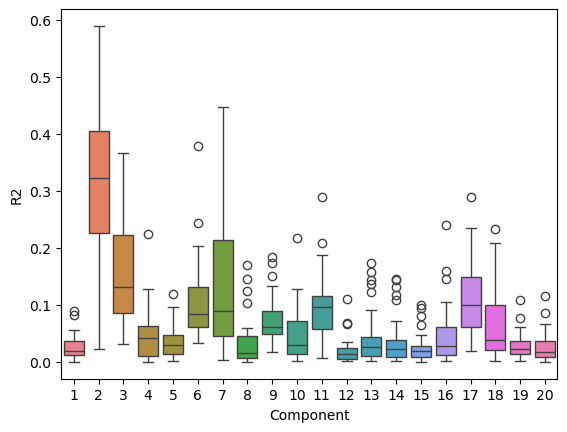

In [45]:
import seaborn as sns

# Convertendo para DataFrame
df = pd.DataFrame(r2_scores)

# Criando o boxplot
sns.boxplot(data=df)
# plt.title('Association ')
plt.xlabel('Component')
plt.ylabel('R2')
plt.show()

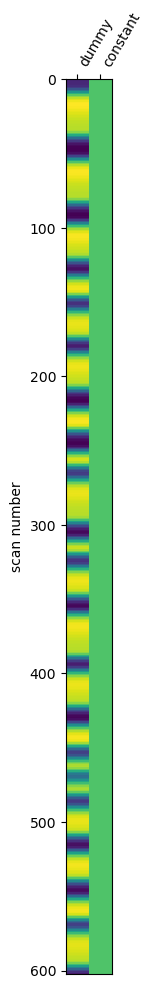

In [54]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)
plt.show()

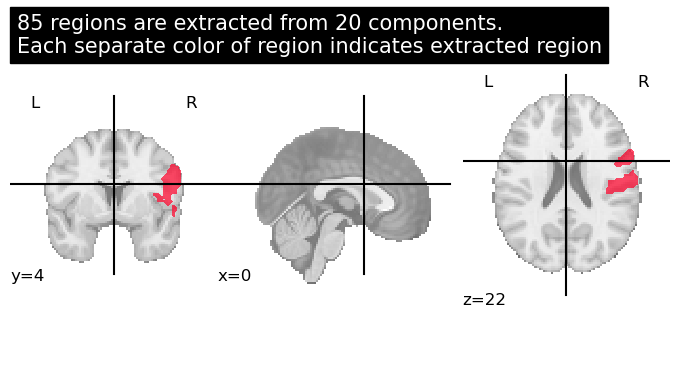

In [26]:
from nilearn.regions import RegionExtractor

# extractor = RegionExtractor(
#     components_img,
#     threshold=0.5,
#     thresholding_strategy="ratio_n_voxels",
#     extractor="local_regions",
#     standardize="zscore_sample",
#     standardize_confounds="zscore_sample",
#     min_region_size=1350,
# )
# # Just call fit() to process for regions extraction
# extractor.fit()
# # Extracted regions are stored in regions_img_
# regions_extracted_img = extractor.regions_img_
# # Each region index is stored in index_
# regions_index = extractor.index_
# # Total number of regions extracted
# n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = (
    "%d regions are extracted from %d components."
    "\nEach separate color of region indicates extracted region"
    % (n_regions_extracted, 20)
)
plotting.plot_prob_atlas(
    regions_extracted_img.slicer[:, :, :, 8:9], view_type="filled_contours", title=title
)

In [30]:
from nilearn.image import math_img
#SAVE COMPONENT MASK or MAP
label = 2
comp = label-1
thr=0

outDir = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\ICA_maps\component{}_mask.nii'.format(label)
binary_map = math_img(f'img > {thr}', img=regions_extracted_img.slicer[:, :, :, 7:8])
binary_map.to_filename(outDir)
# kept_comps = nib.Nifti1Image(gm_comps, components_img.affine, components_img.header)
# nib.save(regions_extracted_img.slicer[:, :, :, 7:8], outDir)

In [4]:
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)

direc = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\all_samples\4D'
path = os.listdir(direc)
filenames = []
for file in path:
    filenames.append(direc + '\\' + file)

root = r'C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts'
for file in filenames:
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(file)
    # Saving time-series
    basename = os.path.basename(file)
    basename = os.path.splitext(basename)[0]
    basename = os.path.splitext(basename)[0]
    outFile =  root + '\\' + basename + '.mat'
    print(outFile)
    data = {'avg_data':timeseries_each_subject}
    if not op.isfile(outFile):
        sio.savemat(outFile, data)
#     # call fit_transform from ConnectivityMeasure object
#     correlation = connectome_measure.fit_transform([timeseries_each_subject])
#     # saving each subject correlation to correlations
#     correlations.append(correlation)

# # Mean of all correlations
# import numpy as np

# mean_correlations = np.mean(correlations, axis=0).reshape(
#     n_regions_extracted, n_regions_extracted
# )

C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_04_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_04_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_04_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_05_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_05_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_06_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_06_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_06_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_07_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_07_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_07_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\

C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_38_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_39_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_39_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_40_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_40_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_40_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_42_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_42_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_42_run_3_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_43_run_1_4D.mat
C:\Users\erick\Documents\mestrado\subjects\task_volumes\ica_ts\subject_43_run_2_4D.mat
C:\Users\erick\Documents\mestrado\subjects\

# USANDO MELODIC

In [34]:
# from nipype.interfaces.fsl import MELODIC

# # Configura o nó MELODIC
# melodic = MELODIC(in_files=func_filenames, 
#                   out_dir=r'C:\Users\erick\Documents\mestrado\ica_melodic',
#                   no_bet=True, 
#                   tr_sec=2.0, 
#                   report=True)

# # Executa a análise de componentes independentes
# resultado = melodic.run()

# # Imprime o caminho para os componentes independentes
# print("Componentes independentes salvos em:", resultado.outputs.out_dir)
